# DC Exurb Restaurant Analysis Using Yelp

**Authors:** Jaclyn Dwyer and Gary Schwaeber
***

![example](Images/Outdoor_Pic.jpeg)

## Overview

The project explores where to open a new restaurant between the DC exurbs of Southern Maryland and Northern Virginia. Yelp data analyzes the success and popularity of different categories of restaurants within these areas. Results show the potential to open a prosperous Dim Sum Cantonese restaurant within Northern Virginia.
***

## Business Problem 

Yelp data is used to determine where to put a new restuarant between the MD and VA exurbs of DC as well as what type of restaurant. Analyzing the amount, populatrity, and success of existing restaurants iss used to decide the area and category of restaurant that could be successful. The goal is to find some category of restaurant where there is an untapped or underdeveloped market.

***

## Data Understanding

Yelp users contribute ratings and reviews based on their experiences at a given business. Data is sourced from a Yelp API call for each restaurant within the areas being investigated using longitude, latitude, and radius parameters. Category 'restuarants' and price '2,3,4' ($) parameters are used to ensure only sit down restaurants are in the data and exclude fast food and quick serve restaurants. The business search data provides information about the cateogry, rating, price, review count, and address of each restaurant. 
 - Review count measures popularity of a business.
 - Rating measures public opinion of a business. 
 - The review data is used to anecdotally support the findings from the business search data.




In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
#Read in business and review total data. 
#converters={'Categories': eval} to read in categories column as list instead of string
df = pd.read_csv('Total',converters={'Categories': eval})
df.head(2)

,id,Name,Review_Count,Categories,Rating,Price,Address,state,Rating_1,Review_1,Time_Created_1,Rating_2,Review_2,Time_Created_2,Rating_3,Review_3,Time_Created_3
0,smTFfg1g_BjsUkorL_ZxLQ,Kuya Ja's Lechon Belly,593,[Filipino],4.5,$$,"['5268-H Nicholson Ln', 'Rockville, MD 20895']",MD,5.0,Yup I went to heaven and back. First time here...,2020-12-19 09:33:31,5.0,BLUF: Oh my crispy Lechon! Months later and my...,2020-11-01 09:33:12,5.0,So happy that I finally got the chance to go h...,2020-09-21 15:20:05
1,9nhzaAX6BdbgF4u2Zxi9RA,Kusshi,486,"[Sushi Bars, Japanese, Whiskey Bars]",4.5,$$,"['11826 Trade St', 'Rockville, MD 20852']",MD,5.0,I've been a customer of Kusshi since they open...,2020-11-16 17:16:22,5.0,"Fast forward almost 2 years later, I am back a...",2020-08-19 08:31:11,5.0,My new favorite sushi spot! It's a little tuck...,2020-07-23 22:57:51


## Data Preparation

A 'state' column from data in the 'display_address' column is created in order to drop non MD and VA restaurants that came through the API. Any restaurants that have 0 reviews are dropped. 

The initial 'category' series have values in list type and up to 3 items in the list per record. The categories in the list are split and placed in separate columns and a new dataframe is created to capture the attributes for each category.

In [4]:
#Check to see max length of category list
df['Categories'].apply(lambda x: len(x)).max()

3

In [36]:
#Create new columns for each category contained in the 'Categories' list
df['cat_1'] = df['Categories'].apply(lambda x: list(x)[0])
df['cat_2'] = df['Categories'].apply(lambda x: list(x)[1] if len(x) >1 else None) 
df['cat_3'] = df['Categories'].apply(lambda x: list(x)[2] if len(x) > 2 else None) 
df.head(2)

,id,Name,Review_Count,Categories,Rating,Price,Address,state,Rating_1,Review_1,Time_Created_1,Rating_2,Review_2,Time_Created_2,Rating_3,Review_3,Time_Created_3,cat_1,cat_2,cat_3
0,smTFfg1g_BjsUkorL_ZxLQ,Kuya Ja's Lechon Belly,593,[Filipino],4.5,$$,"['5268-H Nicholson Ln', 'Rockville, MD 20895']",MD,5.0,Yup I went to heaven and back. First time here...,2020-12-19 09:33:31,5.0,BLUF: Oh my crispy Lechon! Months later and my...,2020-11-01 09:33:12,5.0,So happy that I finally got the chance to go h...,2020-09-21 15:20:05,Filipino,None,None
1,9nhzaAX6BdbgF4u2Zxi9RA,Kusshi,486,"[Sushi Bars, Japanese, Whiskey Bars]",4.5,$$,"['11826 Trade St', 'Rockville, MD 20852']",MD,5.0,I've been a customer of Kusshi since they open...,2020-11-16 17:16:22,5.0,"Fast forward almost 2 years later, I am back a...",2020-08-19 08:31:11,5.0,My new favorite sushi spot! It's a little tuck...,2020-07-23 22:57:51,Sushi Bars,Japanese,Whiskey Bars


In [37]:
#Create dataframe for each category 
cat_1_values = df.groupby('cat_1').agg({'id': 'count','Review_Count':'sum', 'Rating': 'sum'})
cat_2_values = df.groupby('cat_2').agg({'id': 'count','Review_Count':'sum', 'Rating': 'sum'})
cat_3_values = df.groupby('cat_3').agg({'id': 'count','Review_Count':'sum', 'Rating': 'sum'})
cat_1_values.head(2)

,id,Review_Count,Rating
cat_1,,,
Afghan,6,1003,23.5
African,3,248,11.5


In [30]:
#Join all category dataframes together
cat_1_2_values = cat_1_values.join(cat_2_values, how = 'outer', lsuffix = '_one', rsuffix = '_two')
cat_info_df = cat_1_2_values.join(cat_3_values, how = 'outer')
cat_info_df.head(2)

,id_one,Review_Count_one,Rating_one,id_two,Review_Count_two,Rating_two,id,Review_Count,Rating
Afghan,6.0,1003.0,23.5,2.0,79.0,8.5,NaN,NaN,NaN
African,3.0,248.0,11.5,1.0,119.0,4.0,NaN,NaN,NaN


In [32]:
#Fill Nan values with 0
cat_info_df.fillna(0, inplace = True)
#Fix column names
cat_info_df.rename(columns = {'Review_Count' : 'Review_Count_three',
                              'Rating' : 'Rating_three', 'id_one':'count_one',
                              'id_two':'count_two','id':'count_three'}, inplace = True)
cat_info_df.head(2)

,count_one,Review_Count_one,Rating_one,count_two,Review_Count_two,Rating_two,count_three,Review_Count_three,Rating_three
Afghan,6.0,1003.0,23.5,2.0,79.0,8.5,0.0,0.0,0.0
African,3.0,248.0,11.5,1.0,119.0,4.0,0.0,0.0,0.0


In [35]:
#Create columns for total and average review_counts and ratings
cat_info_df['total'] =  cat_info_df['count_one'] + cat_info_df['count_two'] + cat_info_df['count_three']
cat_info_df['total_review_count'] = cat_info_df['Review_Count_one'] + cat_info_df['Review_Count_two'] + cat_info_df['Review_Count_three']
cat_info_df['total_rating'] = cat_info_df['Rating_one'] + cat_info_df['Rating_two'] + cat_info_df['Rating_three']
cat_info_df['avg_review_count'] = cat_info_df['total_review_count'] / cat_info_df['total']
cat_info_df['avg_rating'] = cat_info_df['total_rating'] / cat_info_df['total']
cat_info_df.head(2)

,count_one,Review_Count_one,Rating_one,count_two,Review_Count_two,Rating_two,count_three,Review_Count_three,Rating_three,total,total_review_count,total_rating,avg_review_count,avg_rating
Afghan,6.0,1003.0,23.5,2.0,79.0,8.5,0.0,0.0,0.0,8.0,1082.0,32.0,135.25,4.000
African,3.0,248.0,11.5,1.0,119.0,4.0,0.0,0.0,0.0,4.0,367.0,15.5,91.75,3.875


## Data Modeling
The goal is to find a category of restaurants that have high review counts and low ratings. This would show a category where the existing restaurants are popular, but the public opinion of them is low. 



### Top 15 Categories By Total Amount of Restaurants
A bart chart is used to determine the number of restaurants in each category. These are categories to avoid due to a crowded existing market.

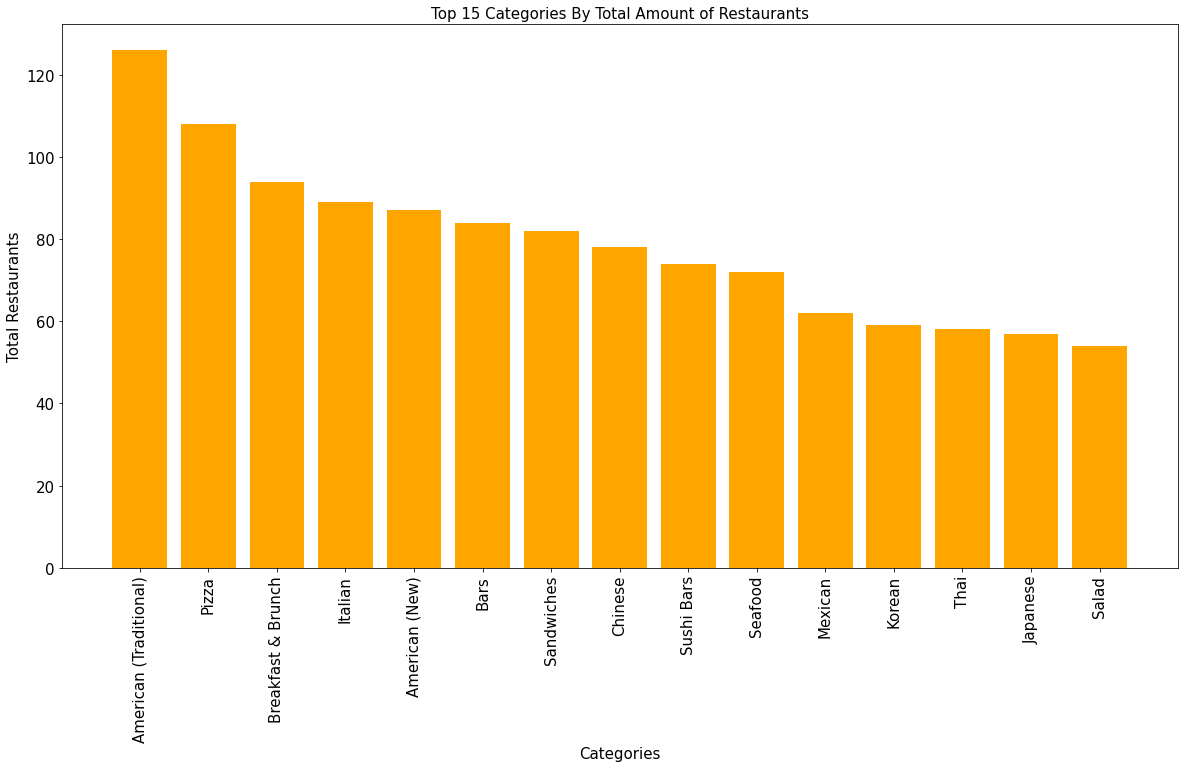

In [39]:
#Create bar graph of Top 15 Categories
fig,ax = plt.subplots(figsize = (20,10))
x = cat_info_df.sort_values('total', ascending = False).reset_index()['index'][0:15]
y = cat_info_df.sort_values('total', ascending = False)['total'][0:15]
ax.bar(x,y, color = 'orange')
plt.xticks(rotation='vertical')
ax.set_title('Top 15 Categories By Total Amount of Restaurants', fontsize = 15)
ax.set_xlabel('Categories', fontsize = 15)
ax.set_ylabel('Total Restaurants', fontsize = 15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)

### Top 15 Categories By Average Review Count With Ratings
Average review count is used to determine top categories where the restaurants are on average more popular than restaurants in other cateogries. Average ratings are added to determine customer satisfaction and to see if there is a disconnect between popularity and customer satisfaction. 


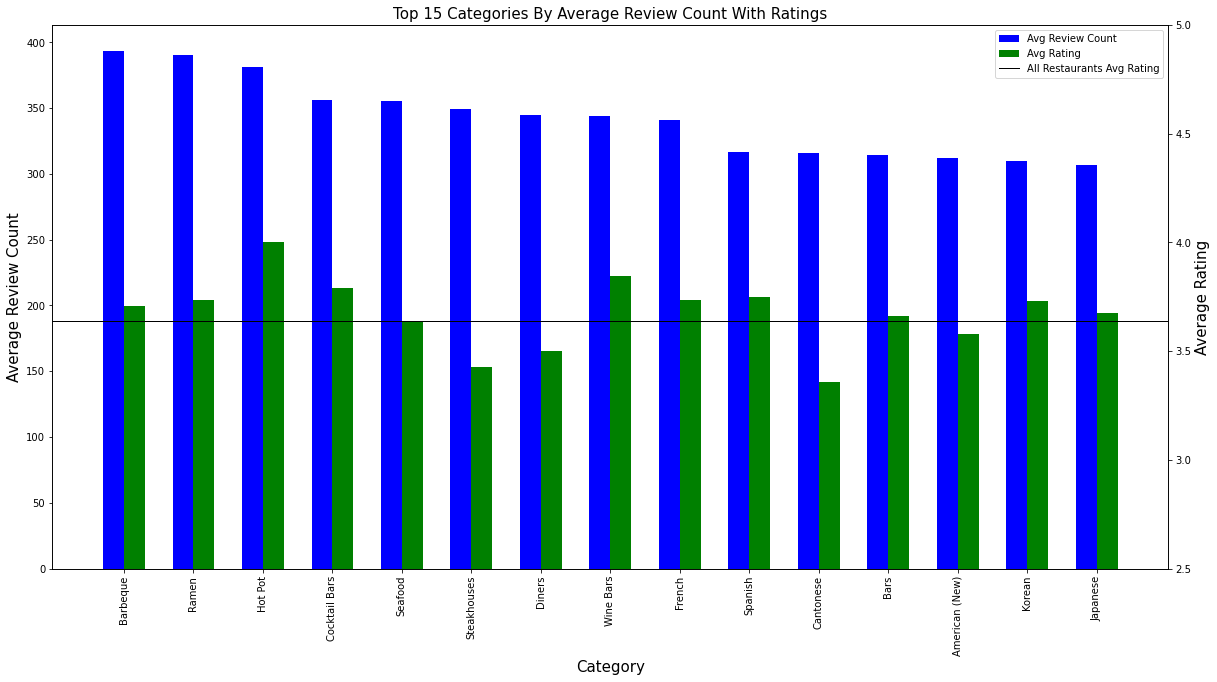

In [40]:
#Create bar chart using average review counts and ratings
x1 = cat_info_df[cat_info_df['total'] > 5].sort_values('avg_review_count', ascending = False).reset_index()['index'][0:15]
y1 = cat_info_df[cat_info_df['total'] > 5].sort_values('avg_review_count', ascending = False)['avg_review_count'][0:15]
y2 = cat_info_df[cat_info_df['total'] > 5].sort_values('avg_review_count', ascending = False)['avg_rating'][0:15]
plt.figure(figsize=(20,10))
x = np.arange(15)
ax1 = plt.subplot(1,1,1)
w = 0.3
plt.xticks(x + w /2, x1, rotation='vertical')
arc =ax1.bar(x, y1, width=w, color='b', align='center')
plt.ylabel('Average Review Count', fontsize = 15)
plt.xlabel('Category', fontsize = 15)
ax2 = ax1.twinx()
ar =ax2.bar(x + w, y2, width=w,color='g',align='center')
plt.ylabel('Average Rating', fontsize = 15)
ax2.set_ylim([2.5,5])
al = plt.axhline(y=df['Rating'].mean(),linewidth=1, color='k', label = 'All Restaurants Avg Rating')
plt.legend([arc, ar, al],['Avg Review Count', 'Avg Rating', 'All Restaurants Avg Rating'])
plt.title('Top 15 Categories By Average Review Count With Ratings', fontsize = 15)
plt.show()

From the above chart, Steakhouses and Cantonese restaurants have the lowest average rating. This shows an unmet satisfaction for restaruants in those categories. 

### Steakhouses vs Cantonese Restaurants
Steakhouses and Cantonese restaurant metrics are compared between each state to decide which category and where to place the new restaurant. 

In [67]:
#Data frame comparing Steakhouses between MD and VA
steakhouse_df = df[(df['cat_2'] == 'Steakhouses') | (df['cat_3'] == 'Steakhouses') | ((df['cat_1'] == 'Steakhouses'))].groupby('state').agg({'Name':'count','Rating':'mean','Review_Count':'mean'}).rename(columns={'Name':'Count'})
steakhouse_df['title'] = 'steakhouse_' + steakhouse_df.index
#Data frame comparing Cantonese Restaurants between MD and VA
cantonese_df = df[(df['cat_2'] == 'Cantonese') | (df['cat_3'] == 'Cantonese')| (df['cat_1'] == 'Cantonese')].groupby('state').agg({'Name':'count','Rating':'mean','Review_Count':'mean'}).rename(columns={'Name':'Count'})
cantonese_df['title'] = 'cantonese_' + cantonese_df.index
#Concat data frames
steak_cant = pd.concat([steakhouse_df, cantonese_df])
steak_cant

,Count,Rating,Review_Count,title
state,,,,
MD,12,3.541667,438.000000,steakhouse_MD
VA,9,3.277778,230.666667,steakhouse_VA
MD,5,3.300000,256.000000,cantonese_MD
VA,2,3.500000,466.500000,cantonese_VA


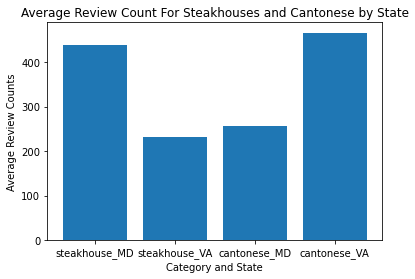

In [70]:
#Create bar chart of review counts 
fig, ax = plt.subplots()
x = steak_cant['title']
y = steak_cant['Review_Count']
ax.bar(x,y)
ax.set_title('Average Review Count For Steakhouses and Cantonese by State')
ax.set_xlabel('Category and State')
ax.set_ylabel('Average Review Counts');

Steakhouses in Maryland and Cantonese restaurants in VA have the highest average review counts. Restaurant average ratings and count are used determine between those options.

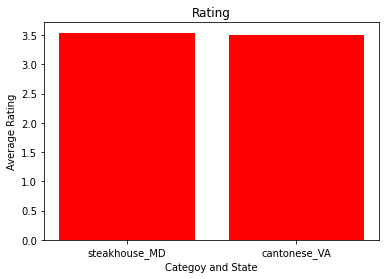

In [88]:
#Create bar chart of ratings
fig, ax = plt.subplots()
x = steak_cant[steak_cant['title'].isin(['steakhouse_MD', 'cantonese_VA'])]['title']
y = steak_cant[steak_cant['title'].isin(['steakhouse_MD', 'cantonese_VA'])]['Rating']
ax.bar(x,y, color = 'red');
ax.set_title('Rating')
ax.set_xlabel('Categoy and State')
ax.set_ylabel('Average Rating');

Ratings between the two options are similar. No determination can be made.

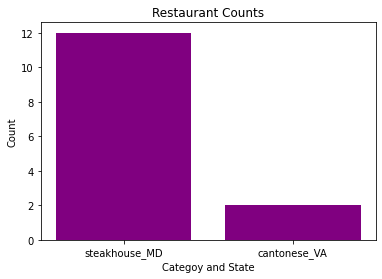

In [89]:
#Create bar chart of ratings
fig, ax = plt.subplots()
x = steak_cant[steak_cant['title'].isin(['steakhouse_MD', 'cantonese_VA'])]['title']
y = steak_cant[steak_cant['title'].isin(['steakhouse_MD', 'cantonese_VA'])]['Count']
ax.bar(x,y, color = 'purple');
ax.set_title('Restaurant Counts')
ax.set_xlabel('Categoy and State')
ax.set_ylabel('Count');

There are a greater number of Steakhouses in MD than Cantonese restaurants in VA. This leads to the conclusion to open a Cantonese restaurant in VA due to less competition.

### MD vs VA Census Data

Let's also grab the median household income and population census data from 2019  for the areas we are looking at to see if that will nudge us further in any direction. Our restaurant radius includes Arlington and Fairfax counties in Virginia and Montgomery County in Maryland.

In [90]:
#Use census data to compare income and age population
import censusdata
arlington_income_pop = censusdata.download('acs5', 2019, censusdata.censusgeo((('state', '51'), ('county', '013'))),
                                   ['DP03_0062E', 'DP03_0001E'],
                                   tabletype='profile')
fairfax_income_pop = censusdata.download('acs5', 2019, censusdata.censusgeo((('state', '51'), ('county', '059'))),
                                   ['DP03_0062E', 'DP03_0001E'],
                                   tabletype='profile')
moco_income_pop = censusdata.download('acs5', 2019, censusdata.censusgeo((('state', '24'), ('county', '031'))),
                                   ['DP03_0062E', 'DP03_0001E'],
                                   tabletype='profile') 

county_data = pd.concat([arlington_income_pop, fairfax_income_pop, moco_income_pop])
county_data.rename(columns = {'DP03_0062E': 'Median Household Income', 'DP03_0001E': 'Age 16+ Population'}, inplace = True)
county_data

,Median Household Income,Age 16+ Population
"Arlington County, Virginia: Summary level: 050, state:51> county:013",120071,195728
"Fairfax County, Virginia: Summary level: 050, state:51> county:059",124831,905295
"Montgomery County, Maryland: Summary level: 050, state:24> county:031",108820,826787


Data shows a higher median household income in VA pointing toward more potential for families to spend that income dining out.

***

## Consideration For Cantonese Restaurants
All restaurants categorized as Cantonese restaurants were also catergorized as Dim Sum restaurants.

In [91]:
df[(df['cat_2'] == 'Cantonese') | (df['cat_3'] == 'Cantonese') | (df['cat_1'] == 'Cantonese')]['cat_1'].value_counts()

Dim Sum    7
Name: cat_1, dtype: int64

Therefore, final conclusion is to open a Dim Sum Cantonese restaurant. 

***
## Evaluation and Conclusion 

![example](Images/Dim_Sum_Pic.JPG)

A Dim Sum Cantonese restaurant in VA shows potential to be the most posperous. This was concluded with VA Dim Sum Cantonese restauarnts having higher average review counts, lower average ratings, lower counts, and a higher median household income in VA. 

Annecdotally, reviews from the Dim Sum Cantonese restaurants in VA emphasize the results concluded above by showing a desire for more and better Dim Sum Cantonese restaurants in the area. 

In [94]:
#Code to show full review text
from IPython.display import display
pd.set_option('display.max_colwidth', None)

In [95]:
df[df['id'] == 'qYt89GRyEBBEP29J4wF2Zw']['Review_1'].to_string(index = False)

' We had been looking forward to visiting a Dim Sum place in DC and to our disappointment they had been shut down for a couple of years. That left us with...'

In [96]:
df[df['id'] == 'duer52a0aMheoSXUNZmnTQ']['Review_1'].to_string(index = False)

' 5 stars for Peking duck, 3 stars for the other dishes. They don\'t call it "other dish" house, after all!\\n\\nThey were open for thanksgiving 2020, and of the...'

***
## Next Steps

While the data supports opening a Dim Sum Cantonese restaurant in VA there are some things to further consider. 

 - Yelp data can only shed light on popularity and restaurant sentiment. It does not provide insight on potential profitability.
 - The length of how long a business has been open could bias the average review counts.
 - The current pandemic has changed dining trends which may not be reflected in the historical data from Yelp.

About Cantonese cuisine:
https://www.seriouseats.com/2014/10/introduction-what-is-cantonese-chinese-cuisine.html